In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import mplhep as hep
import matplotlib.colors as mcolors
from scipy.stats import linregress

In [2]:
with open('Run11_list.txt') as f:
    lines = f.read().split('\n')
tags = None
IDs=[]
layers=[]
channels =[]
allChannelsHG = []
allChannelsLG = []
din={}
for line in lines:
    if line[:2]=="//" or len(line)==0:
        continue
    if tags is None:
        tags = line.split()
        tags=tags[-3:]
        continue;
    split = line.split()
    layer, channel, LG, HG = split[0:4]
    ID=int(layer)*64+int(channel)
    if ID not in IDs:
        din[f"{ID}_LG"] = []
        din[f"{ID}_HG"] = []
        IDs.append(ID)
    din[f"{ID}_LG"].append(float(LG))
    din[f"{ID}_HG"].append(float(HG))
    allChannelsHG.append(float(HG))
    allChannelsLG.append(float(LG))

Fit: HG = 9.601 * LG + -457.225 (R² = 0.963)


Text(0.5, 1.0, 'HG vs LG')

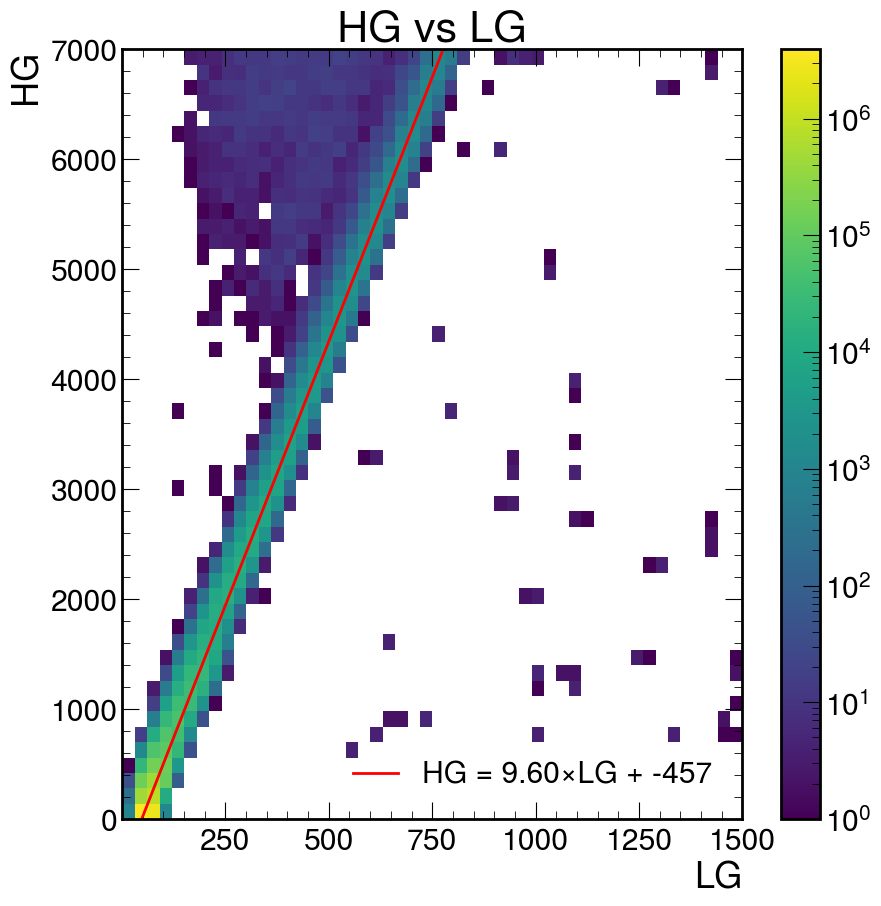

In [3]:
# Apply CMS style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.bbox'] = 'tight'
hep.style.use(hep.style.CMS)

# Convert to NumPy arrays if they aren't already
x = np.array(allChannelsLG)
y = np.array(allChannelsHG)

# Apply the mask
mask = (x >= 1) & (x <= 1500) & (y >= 0) & (y <= 7000)
x_masked = x[mask]
y_masked = y[mask]

# Fit the line on the masked data
slope, intercept, r_value, p_value, std_err = linregress(x_masked, y_masked)
print(f"Fit: HG = {slope:.3f} * LG + {intercept:.3f} (R² = {r_value**2:.3f})")

# Plot the 2D histogram with the same range
plt.hist2d(x, y, bins=50, range=[(1, 1500), (0, 7000)], cmap='viridis', norm=mcolors.LogNorm())
plt.colorbar()

# Overlay the fitted line within the same x-range
x_line = np.linspace(1, 1500, 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'HG = {slope:.2f}×LG + {intercept:.0f}')
plt.legend()

plt.xlabel('LG')
plt.ylabel('HG')
plt.title('HG vs LG')


C:\Users\miama\AppData\Local\Temp\ipykernel_8316\984904810.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1.5, 1])


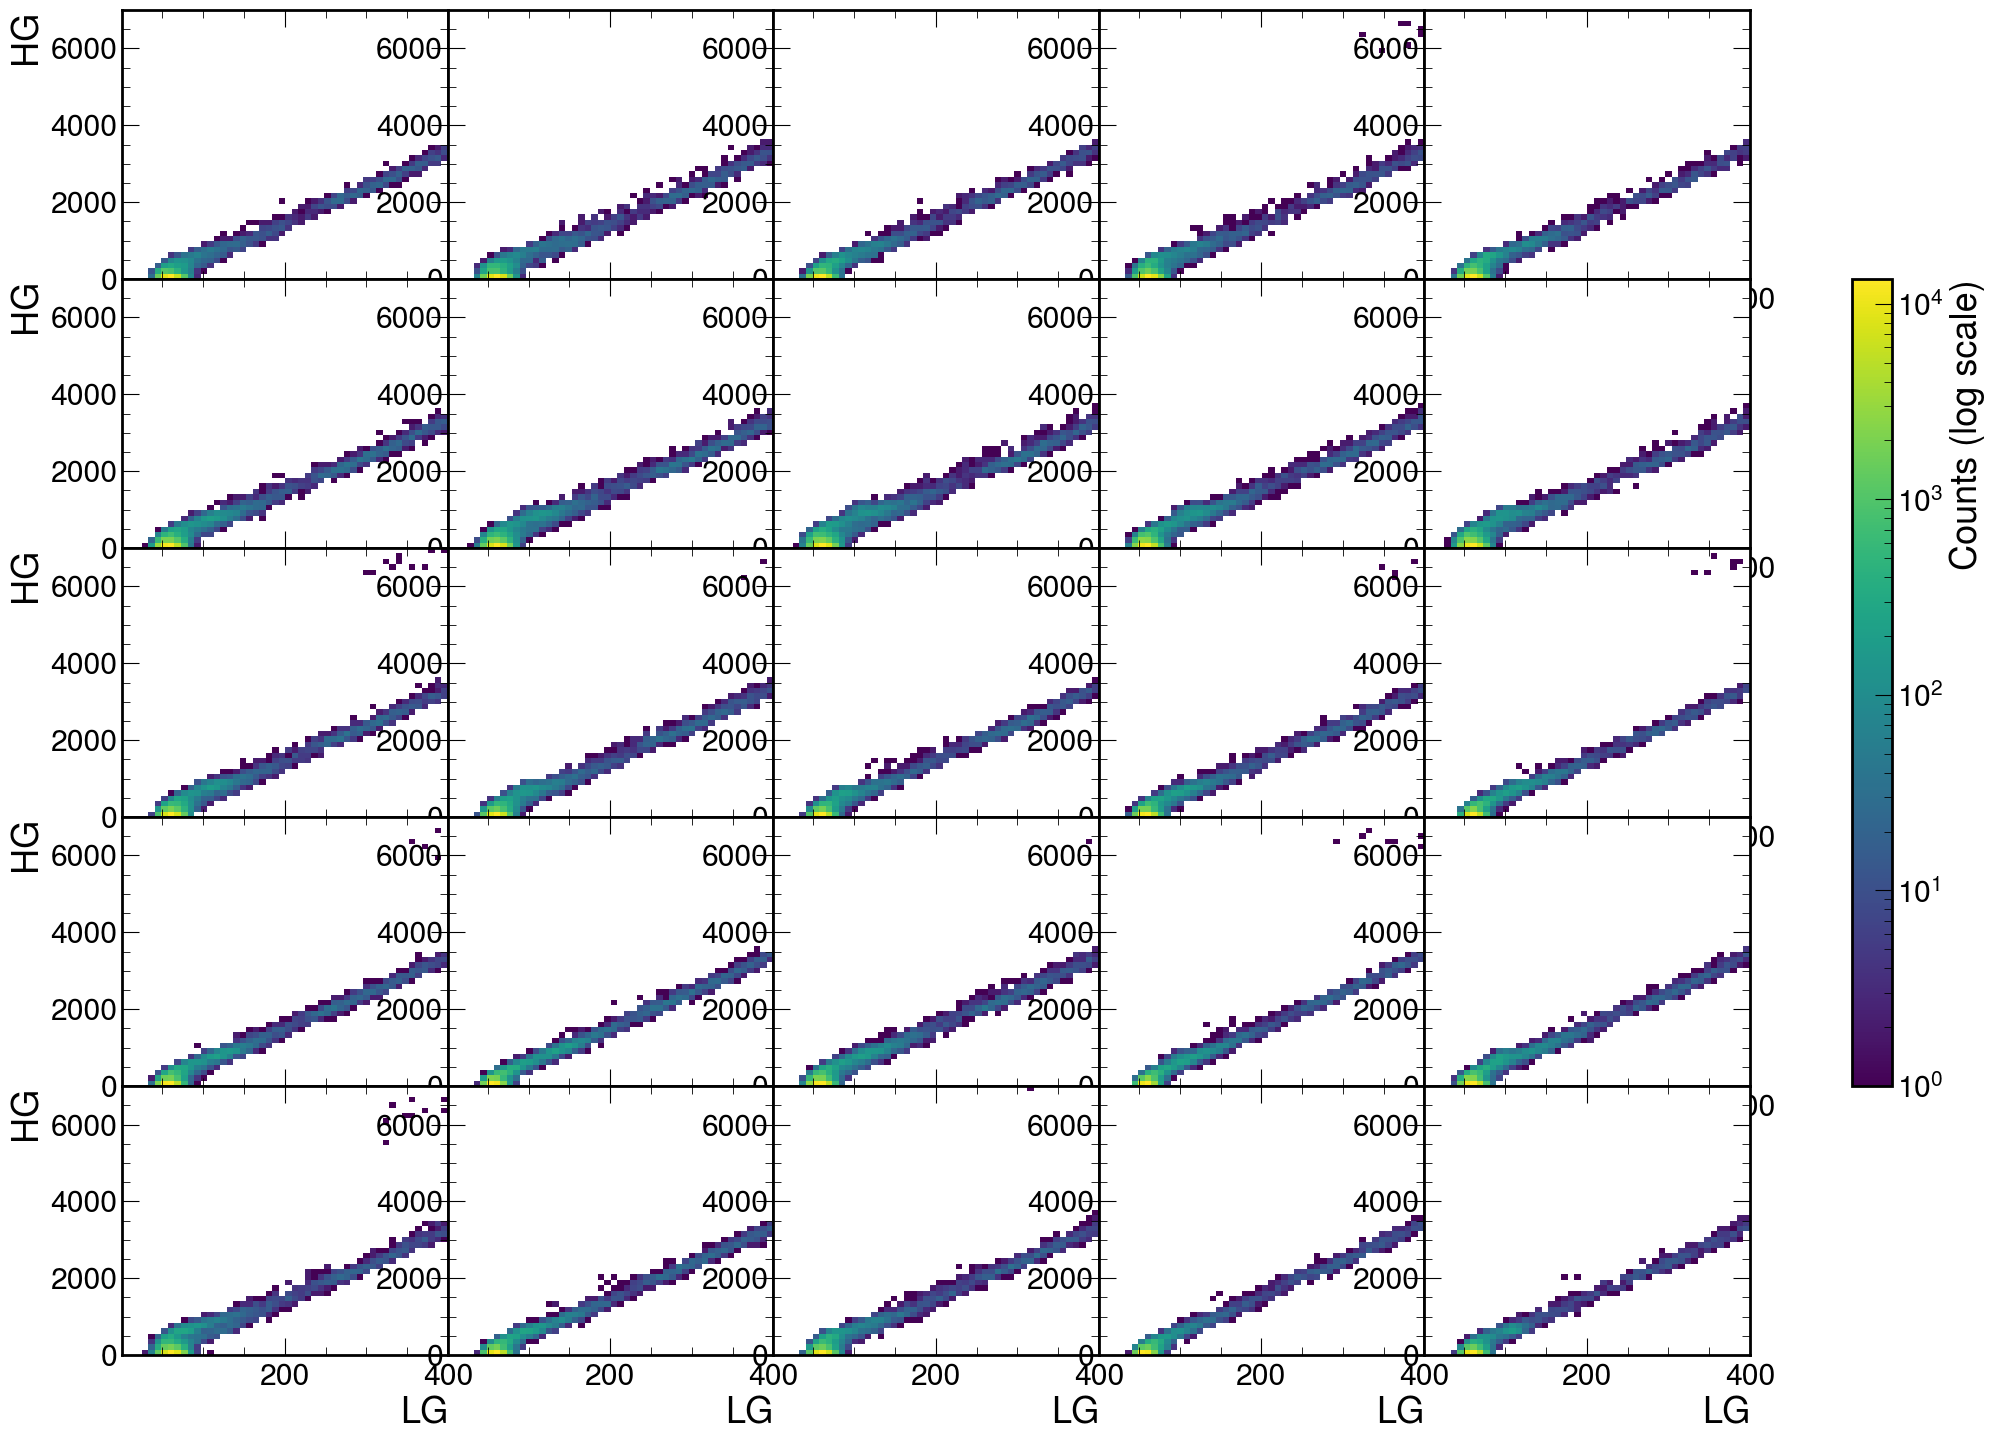

In [4]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))


for ID, ax in zip(range(25), axes.flat):
    lg = din[f"{ID}_LG"]
    hg = din[f"{ID}_HG"]

    h = ax.hist2d(
        lg, hg,
        bins=50,
        range=[(1, 400), (0, 7000)],
        cmap='viridis',
        norm=mcolors.LogNorm()
    )

    if ID % 5 == 0:
        ax.set_ylabel('HG')
    if ID >= (5 - 1) * 5:
        ax.set_xlabel('LG')

plt.tight_layout(pad=0.0)
plt.tight_layout(rect=[0, 0, 1.5, 1])
plt.subplots_adjust(wspace=0, hspace=0)
cbar = fig.colorbar(h[3], ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label("Counts (log scale)")

plt.show()

In [5]:
import pandas as pd
import numpy as np


data = []
for ID in range(25):  
    lg_values = din[f"{ID}_LG"]
    hg_values = din[f"{ID}_HG"]
    
    
    min_length = min(len(lg_values), len(hg_values))
    for i in range(min_length):
        data.append({
            'ID': ID,
            'LG': lg_values[i],
            'HG': hg_values[i]
        })

df = pd.DataFrame(data)

df['LG_HG_ratio'] = df['HG'] / df['LG']  # Example derived column

df.to_pickle('chanel_data.pkl')

print(df.head())
print(f"\nDataFrame shape: {df.shape}")
print(f"Unique IDs: {df['ID'].nunique()}")

   ID    LG     HG  LG_HG_ratio
0   0  58.0   60.0     1.034483
1   0  60.0   70.0     1.166667
2   0  50.0   45.0     0.900000
3   0  56.0   74.0     1.321429
4   0  63.0  328.0     5.206349

DataFrame shape: (907125, 4)
Unique IDs: 25
